## **Section 1: Business Understanding**


---


##### TFI is the Taiwanese Financial Institution and it offers credit cards. It has been detecting an increase in defaults among its customers. This situation is negatively affecting the revenue of the company and they know they can do something about it if they could anticipate which credit card holders are going to default on their next payment. The management from TFI have stated that for them it is important not only to predict which customers will default, but they would like to know why they are defaulting. Hence, the purpose behind this project includes answer to following questions:

<br/>

>**1. How does the probability of default payment vary by categories of different demographic variables?**  
**2. What age group do people with high line of credit belong to?**  
**3. Which variables are the strongest predictors of default payment?**

In [1]:
 # mount google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Writing a Data Science Blog Post'

/content/drive/MyDrive/Writing a Data Science Blog Post


In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

%matplotlib inline
sns.set_style('whitegrid')

## **Section 2: Data Understanding**

### **Access and Explore**

In [4]:
# load the dataset
ccd = pd.read_csv('UCI_Credit_Card.csv', index_col='ID')
ccd.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Data Dimensions: rows x cols
ccd.shape

(30000, 24)

In [6]:
# Summary statistics 
ccd.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [7]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [8]:
# Percentage of defaulters & non defaulters in the whole dataset 
ccd['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

## **Section 3: Prepare Data**

### **Clean**

In [9]:
# lowercase column headers
ccd.rename(columns=lambda x: x.lower(), inplace=True)

# rename columns
ccd.rename(columns={'pay_0': 'pay_1'}, inplace=True)
ccd.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

ccd_ = ccd.copy()

In [10]:
# Transform the 0 and 3 values to 3
ccd_.loc[(ccd_['marriage'] > 2) | (ccd_['marriage'] < 1), 'marriage'] = 3


# Transform the -1 and -2 values to 0
pay_features = ['pay_'+str(i) for i in range(1, 7)]
for col in pay_features:
    ccd_.loc[ccd_[col] <= 0, col] = 0


# Numerical features
pay_amt_features = ['pay_amt'+str(i) for i in range(1, 7)]
bill_amt_features = ['bill_amt'+str(i) for i in range(1, 7)]
numerical_features = ['limit_bal', 'age'] + pay_amt_features + bill_amt_features


# Creating binary features
ccd_['male'] = (ccd_['sex'] == 1).astype(int)
ccd_['married'] = (ccd_['marriage'] == 1).astype(int)
ccd_['grad_school'] = (ccd_['education'] == 1).astype(int)
ccd_['university'] = (ccd_['education'] == 2).astype(int)
binary_features = ['male', 'married', 'grad_school', 'university']


# Drop columns
ccd_.drop(['sex', 'education', 'marriage'], axis=1, inplace=True)

In [11]:
ccd_.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'male', 'married',
       'grad_school', 'university'],
      dtype='object')

## **Section 4: Data Modelling**

In [18]:
def calculate_metrics(y_true, y_pred):
    '''
    Prints evaluation metrics
    input:
        y_true: true labels
        y_pred: predicted labels

    output:
        return none 
    '''

    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix \n{confusion_matrix(y_true, y_pred)}')
    print(f'Accuracy Score of a model is {accuracy_score(y_true, y_pred)}')

    fpr, tpr, thresh = roc_curve(y_true, y_pred)
    auc_score_log_reg = roc_auc_score(y_true, y_pred)
    print(f'The AUC score is {auc_score_log_reg}')

    plt.plot(fpr, tpr)
    plt.title(f'ROC with AUC score of {round(auc_score_log_reg, 3)}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [13]:
def train(df, y, continous_features):
    '''
    Fit the model
    input:
        df: dataframe
        y: an array of true labels 
        continous_features: list of continuous features to standardize

    output:
        model: trained model
        scaler: a standard scaler object
    '''

    scaler = StandardScaler()
    scaler.fit(df[continous_features])

    df.loc[:, continous_features] = scaler.transform(df[continous_features])

    model = LogisticRegression()
    model.fit(df, y)

    return model, scaler


def predict(df, scaler, model, continous_features):
    '''
    A function to Predict
    input:
        df: dataframe
        scaler: a scaler obj
        model: trained model
        continous_features: list of continuous features to standardize

    output:
        y_pred: an array of predicted values 
    '''

    df.loc[:, continous_features] = scaler.transform(df[continous_features])
    y_pred = model.predict_proba(df)[:, 1]

    return y_pred

### **Model 1: Logistic Regression + all features**

In [14]:
# model with all features
kf = KFold(n_splits=5, shuffle=True, random_state=1)

aucs_1 = []   

for i, (train_idx, test_idx) in enumerate(kf.split(ccd_)):

    # split the data into train and test
    X_train, X_test = ccd_.iloc[train_idx], ccd_.iloc[test_idx]
    y_train = X_train.default.values
    y_test = X_test.default.values
    
    # fit the model
    model, scaler = train(X_train.drop('default', axis=1), y_train, numerical_features)

    # predict
    y_pred = predict(X_test.drop('default', axis=1), scaler, model, numerical_features)

    # calculate AUC score
    auc = roc_auc_score(y_test, y_pred)
    aucs_1.append(auc)

In [15]:
print(f'auc: {np.mean(aucs_1)} ± {np.std(aucs_1)}')

auc: 0.7593413596635291 ± 0.006824574904960229


### **Model 2: Logistic Regression + with reduced set of features**

In [16]:
# model with reduced set of features
df_2 = ccd_[['limit_bal', 'age', 'bill_amt6', 'default'] + binary_features + pay_features]

aucs_2 = []

# kfold CV
kf = KFold(n_splits=5, shuffle=True, random_state=1)  

for i, (train_idx, test_idx) in enumerate(kf.split(df_2)):

    # split data into train and test
    X_train, X_test = df_2.iloc[train_idx], df_2.iloc[test_idx]
    y_train = X_train.default.values
    y_test = X_test.default.values
    
    # fit the model
    model, scaler = train(X_train.drop('default', axis=1), y_train, ['limit_bal', 'age', 'bill_amt6'])

    # predict
    y_pred = predict(X_test.drop('default', axis=1), scaler, model, ['limit_bal', 'age', 'bill_amt6'])

    # calculate auc score
    auc = roc_auc_score(y_test, y_pred)
    aucs_2.append(auc)

In [17]:
print(f'auc: {np.mean(aucs_2)} ± {np.std(aucs_2)}')

auc: 0.753943511899938 ± 0.006426366492302003


### **Model 3**: Random Forest + all features

In [18]:
# MODEL 3: RANDOM FOREST + all_features
X = ccd_[numerical_features + binary_features + pay_features]
y = ccd_['default']


# Spliting data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [19]:
param_grid = { 
    'n_estimators': [600, 750, 900],
    'max_depth' : [3, 4, 5],
    'min_samples_split': [4, 5, 6]
}

rand_forest = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv=5, verbose=3, refit=True)
rf_cv.fit(X_train, y_train)

print(f'Best parameters of the model: {rf_cv.best_params_}')
print(f'Best CV score of the best estimator: {rf_cv.best_score_}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, min_samples_split=4, n_estimators=600;, score=0.814 total time=   8.1s
[CV 2/5] END max_depth=3, min_samples_split=4, n_estimators=600;, score=0.803 total time=   9.1s
[CV 3/5] END max_depth=3, min_samples_split=4, n_estimators=600;, score=0.803 total time=   8.8s
[CV 4/5] END max_depth=3, min_samples_split=4, n_estimators=600;, score=0.811 total time=   8.3s
[CV 5/5] END max_depth=3, min_samples_split=4, n_estimators=600;, score=0.810 total time=   9.2s
[CV 1/5] END max_depth=3, min_samples_split=4, n_estimators=750;, score=0.812 total time=  10.8s
[CV 2/5] END max_depth=3, min_samples_split=4, n_estimators=750;, score=0.803 total time=  10.4s
[CV 3/5] END max_depth=3, min_samples_split=4, n_estimators=750;, score=0.804 total time=  13.0s
[CV 4/5] END max_depth=3, min_samples_split=4, n_estimators=750;, score=0.810 total time=  11.0s
[CV 5/5] END max_depth=3, min_samples_split=4, n_estimators=750;,

In [20]:
# Predict
y_pred_train_cv = rf_cv.predict(X_train)
y_pred_test_cv = rf_cv.predict(X_test)

Train Result:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17523
           1       0.70      0.29      0.41      4977

    accuracy                           0.82     22500
   macro avg       0.76      0.63      0.65     22500
weighted avg       0.80      0.82      0.79     22500

Confusion Matrix 
[[16895   628]
 [ 3512  1465]]
Accuracy Score of a model is 0.816
The AUC score is 0.6292577082107227


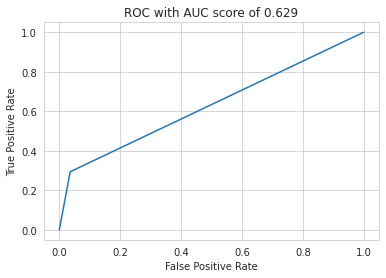



Test Result:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5841
           1       0.69      0.29      0.41      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.63      0.65      7500
weighted avg       0.80      0.82      0.78      7500

Confusion Matrix 
[[5625  216]
 [1170  489]]
Accuracy Score of a model is 0.8152
The AUC score is 0.6288879539254996


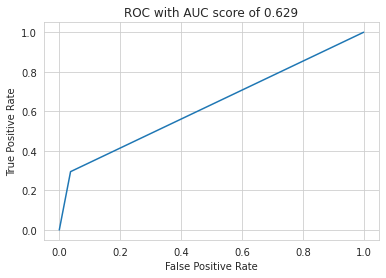

In [21]:
# Print the metrics (Model 3)
print('Train Result:')
calculate_metrics(y_train, y_pred_train_cv)
print('\n')
print('Test Result:')
calculate_metrics(y_test, y_pred_test_cv)

### **Model 4: Random Forest + with reduced features**

In [65]:
# MODEL 4: RANDOM FOREST + with reduced features
X = ccd_[['limit_bal', 'age'] + binary_features + pay_amt_features + pay_features]
y = ccd_['default']


# Spliting data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [66]:
param_grid = { 
    'n_estimators': [350, 500, 600],
    'max_depth' : [6, 7, 8],
    'min_samples_leaf': [6, 7, 8]
}

rand_forest = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv=5, verbose=3, refit=True)
rf_cv.fit(X_train, y_train)

print(f'Best parameters of the model: {rf_cv.best_params_}')
print(f'Best CV score of the best estimator: {rf_cv.best_score_}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=6, min_samples_leaf=6, n_estimators=350;, score=0.820 total time=   4.8s
[CV 2/5] END max_depth=6, min_samples_leaf=6, n_estimators=350;, score=0.814 total time=   4.1s
[CV 3/5] END max_depth=6, min_samples_leaf=6, n_estimators=350;, score=0.819 total time=   4.3s
[CV 4/5] END max_depth=6, min_samples_leaf=6, n_estimators=350;, score=0.826 total time=   5.2s
[CV 5/5] END max_depth=6, min_samples_leaf=6, n_estimators=350;, score=0.824 total time=   4.1s
[CV 1/5] END max_depth=6, min_samples_leaf=6, n_estimators=500;, score=0.820 total time=   6.8s
[CV 2/5] END max_depth=6, min_samples_leaf=6, n_estimators=500;, score=0.814 total time=   6.1s
[CV 3/5] END max_depth=6, min_samples_leaf=6, n_estimators=500;, score=0.819 total time=   6.1s
[CV 4/5] END max_depth=6, min_samples_leaf=6, n_estimators=500;, score=0.827 total time=   6.6s
[CV 5/5] END max_depth=6, min_samples_leaf=6, n_estimators=500;, score=0.8

In [59]:
# Predict
y_pred_train_cv = rf_cv.predict(X_train)
y_pred_test_cv = rf_cv.predict(X_test)

Train Result:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17523
           1       0.71      0.33      0.45      4977

    accuracy                           0.82     22500
   macro avg       0.77      0.64      0.67     22500
weighted avg       0.81      0.82      0.79     22500

Confusion Matrix 
[[16850   673]
 [ 3347  1630]]
Accuracy Score of a model is 0.8213333333333334
The AUC score is 0.644549932256433


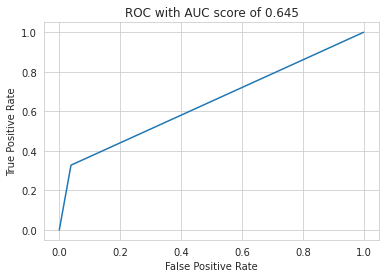



Test Result:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5841
           1       0.69      0.32      0.44      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500

Confusion Matrix 
[[5601  240]
 [1124  535]]
Accuracy Score of a model is 0.8181333333333334
The AUC score is 0.6406972845505349


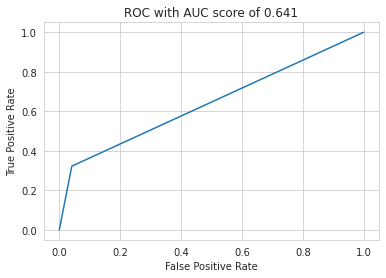

In [60]:
# Print the metrics (Model 3)
print('Train Result:')
calculate_metrics(y_train, y_pred_train_cv)
print('\n')
print('Test Result:')
calculate_metrics(y_test, y_pred_test_cv)

## **Section 5: Evaluation**

### **Question 1: How does the probability of default payment vary by categories of different demographic variables?**

In [11]:
def compute_cross_tabs(df, col_name, dict_category):
    '''
    A function that compute cross tab and display a bar chat

    input:
        df: a dataframe
        col_name: a column name
        dict_category: a dictionary to rename column names

    output:
        return none

    '''
    cross_tab = pd.crosstab(ccd_['default'], ccd_[col_name], margins=True, normalize=False)
    cross_tab_nm = cross_tab / cross_tab.loc['All']

    # Rename columns
    cross_tab_nm.rename(columns=dict_category, inplace=True)
    
    # Plot the bar chart to see the distribution of default & Non default rate by col_name
    ax = cross_tab_nm.loc[[0, 1], list(dict_category.values())].T.plot.bar(rot=0, ylabel='Row counts in %', 
                                                            title=f'Distribution of Default vs Non default rate in (%) by {col_name}', 
                                                            figsize=(8, 6))
    # annotate chart with values
    for p in ax.patches:
        h, x = p.get_height(), p.get_x()
        xy = (x, h*1.025)
        ax.annotate(text=f'{round(h*100, 2)}%', xy=xy)
    
    # Save the figure
    plt.savefig(f'{col_name}.png')

2    18112
1    11888
Name: sex, dtype: int64


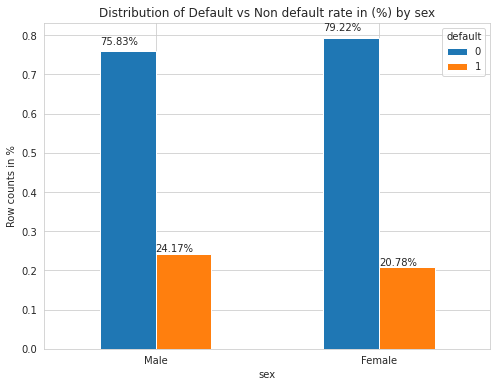

In [12]:
# Gender: (1 = male, 2 = female)

# Check the distribution of gender in the whole dataset
print(ccd_.sex.value_counts(normalize=False))

# Plotting bar chart
compute_cross_tabs(ccd_, 'sex', {1: 'Male', 2: 'Female'})

> - We can see from the above plot that default rate in males marginally ahead of females by less than 4% even when there are 20% more females in the dataset. To understand further, we can dig a bit deeper to find out what age group in both male and female defaults the most.

<Figure size 720x432 with 0 Axes>

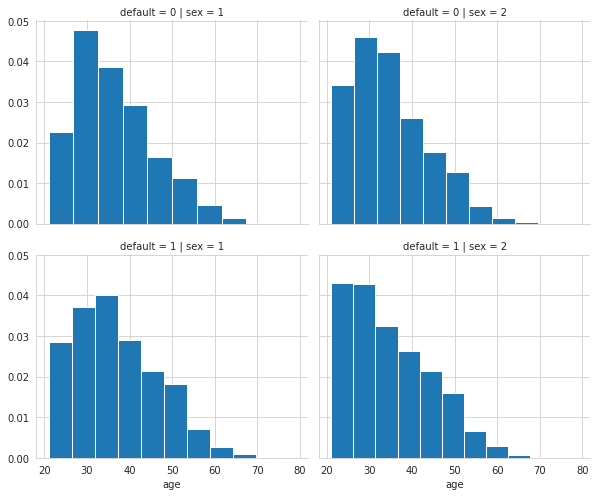

In [13]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(ccd_, row='default', col='sex', height=3.5, aspect=1.20)
g.map(plt.hist, 'age', density=True);

# Save figure
plt.savefig('sex-default-age.png')

> - As seen in the graph, the majority of defaulters and non defaulters in both the gender lies in the age group of approximately 20-35 and follow a decreasing trend as the age of the customers increases. This could possibly mean that credit cards were largely issued to the young people since 75% of the customers in the dataset has age less than 41 years.

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: marriage, dtype: float64


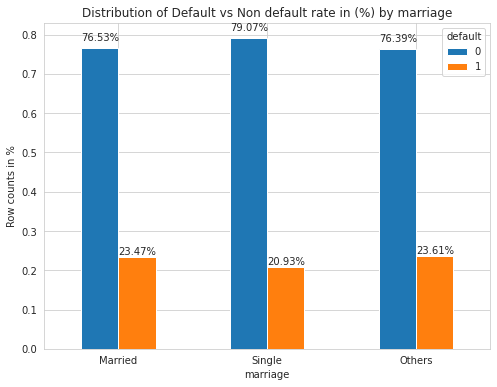

In [14]:
# Marital status: (1=married, 2=single, 3=others)
print(ccd_.marriage.value_counts(normalize=True))

# Transform the undocumented value (of 0) to 3 
# since 'others' category accounts for just around 1% values in the dataset.
ccd_.loc[(ccd_['marriage'] > 2) | (ccd_['marriage'] < 1), 'marriage'] = 3

compute_cross_tabs(ccd_, 'marriage', {1: 'Married', 2: 'Single', 3: 'Others'})

> - Not much of a difference between marriage categories w.r.t default and non default rate.  

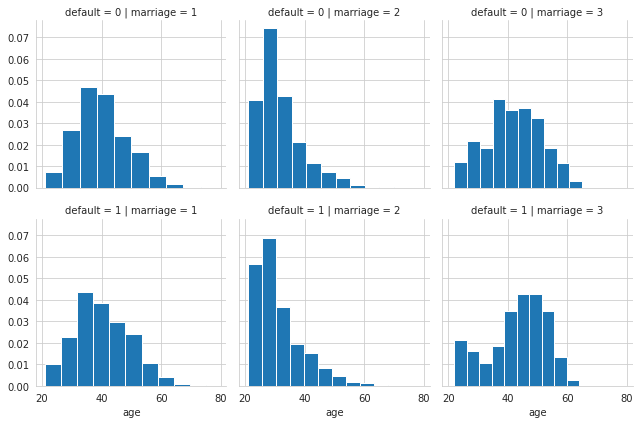

In [15]:
g = sns.FacetGrid(ccd_, row='default', col='marriage')
g.map(plt.hist, 'age', density=True);

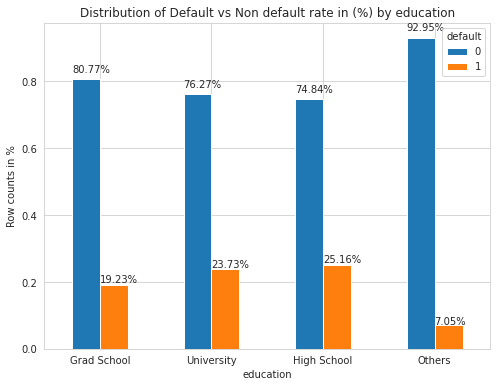

In [16]:
# Education: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
ccd_.education.value_counts(normalize=True)

# Transform unknown categories to others.
ccd_.loc[(ccd_['education'] > 4) | (ccd_['education'] < 1), 'education'] = 4

compute_cross_tabs(ccd_, 'education', {1: 'Grad School', 2: 'University', 3: 'High School', 4: 'Others'})



> It is very tempting to infer from the plot that 'Others' category has the least default rate of all groups. However, the column have values that were listed as unknowns (probably filled in for missing values) and some values undocumented in the data dictionary. Hence those categories were grouped as 'Others'. 


> Nonetheless, there are insignificant differences found between High School and University passout clients. However, unsurprisingly, grad school clients are less defaulters compared to rest since graduates are more likely to get a high salary jobs that might make them pay their dues.

### **Question 2. What age group do people with high line of credit belong to?**

- To answer this question, it is important to define what high line of credit is. I assume that credit limit greater than 75th percentile (i.e., top 25%) is what high borrowing limit means.

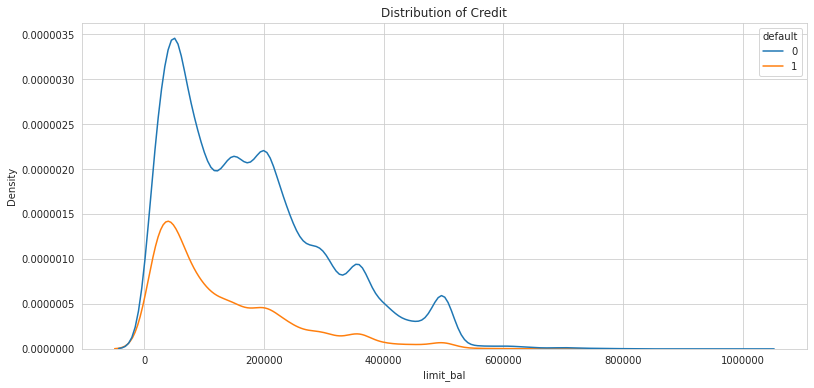

In [17]:
# Credit distribution of payers vs non-payers
fig, ax = plt.subplots(figsize=(13, 6))
sns.kdeplot(data=ccd_, x='limit_bal', hue='default', ax=ax)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Distribution of Credit')

# Save the figure
plt.savefig('credit_limit.png')

> The density plot illustrates people with high credit limit have significantly lower default percentage. This makes sense since a bank must have verified applicants history before issuing such high credit.  

In [18]:
# Bin values into distinct categories
bins = [20,30,40,50,60,70,80]
names = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
ccd_['age_group'] = pd.cut(x=ccd_.age, bins=bins, labels=names, right=True)

In [19]:
# Compute and extract rows > 75th percentile
limit_bal75 = ccd_.limit_bal.quantile(0.75)
top25_high_credit = ccd_.loc[ccd_['limit_bal'] > limit_bal75, :]

In [20]:
top25_high_credit.shape

(7067, 25)

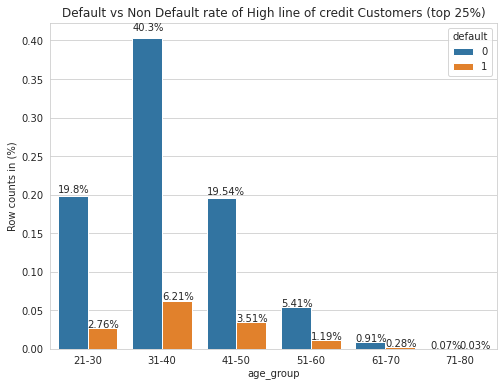

In [21]:
# Count the number of clients in each age group.
grouped_df = top25_high_credit.groupby(['age_group', 'default']).size() / top25_high_credit.shape[0]
grouped_df = grouped_df.reset_index(name='counts')

# add the plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=grouped_df, x='age_group', y='counts', hue='default', ax=ax);

# annotate the plot
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x, h*1.025)
    ax.annotate(text=f'{round(h*100,2)}%', xy=xy)

ax.set_title('Default vs Non Default rate of High line of credit Customers (top 25%)')
ax.set(ylabel='Row counts in (%)')

# Save the figure
plt.savefig('age-group.png')
plt.show()

> The bar chart clearly shows the high credit holders belong to the age group of 31-40 (around 46%), while the age groups 41-50 and 21-30 stands at second and third place respectively. Moreover, the default rate follows the same trend as the non default rate with age group 31-40 at the top.
We can try to find what proportion of this age group (31-40) have completed grad school because only after careful consideration by the bank, it issues an applicant a high credit limit.

In [22]:
# What proportion of age group (31-40) have finished their grad school?
top25_high_credit.loc[top25_high_credit['age_group'] == '31-40']['education'].value_counts(normalize=True)

1    0.543657
2    0.364770
3    0.076666
4    0.014907
Name: education, dtype: float64

> More than half the population (of age group 31-40) have concluded grad school. Around 36% have finished University education while the remaining categories stand at roughly 8%. 

### **Question 3. Which variables are the strongest predictors of default payment?**

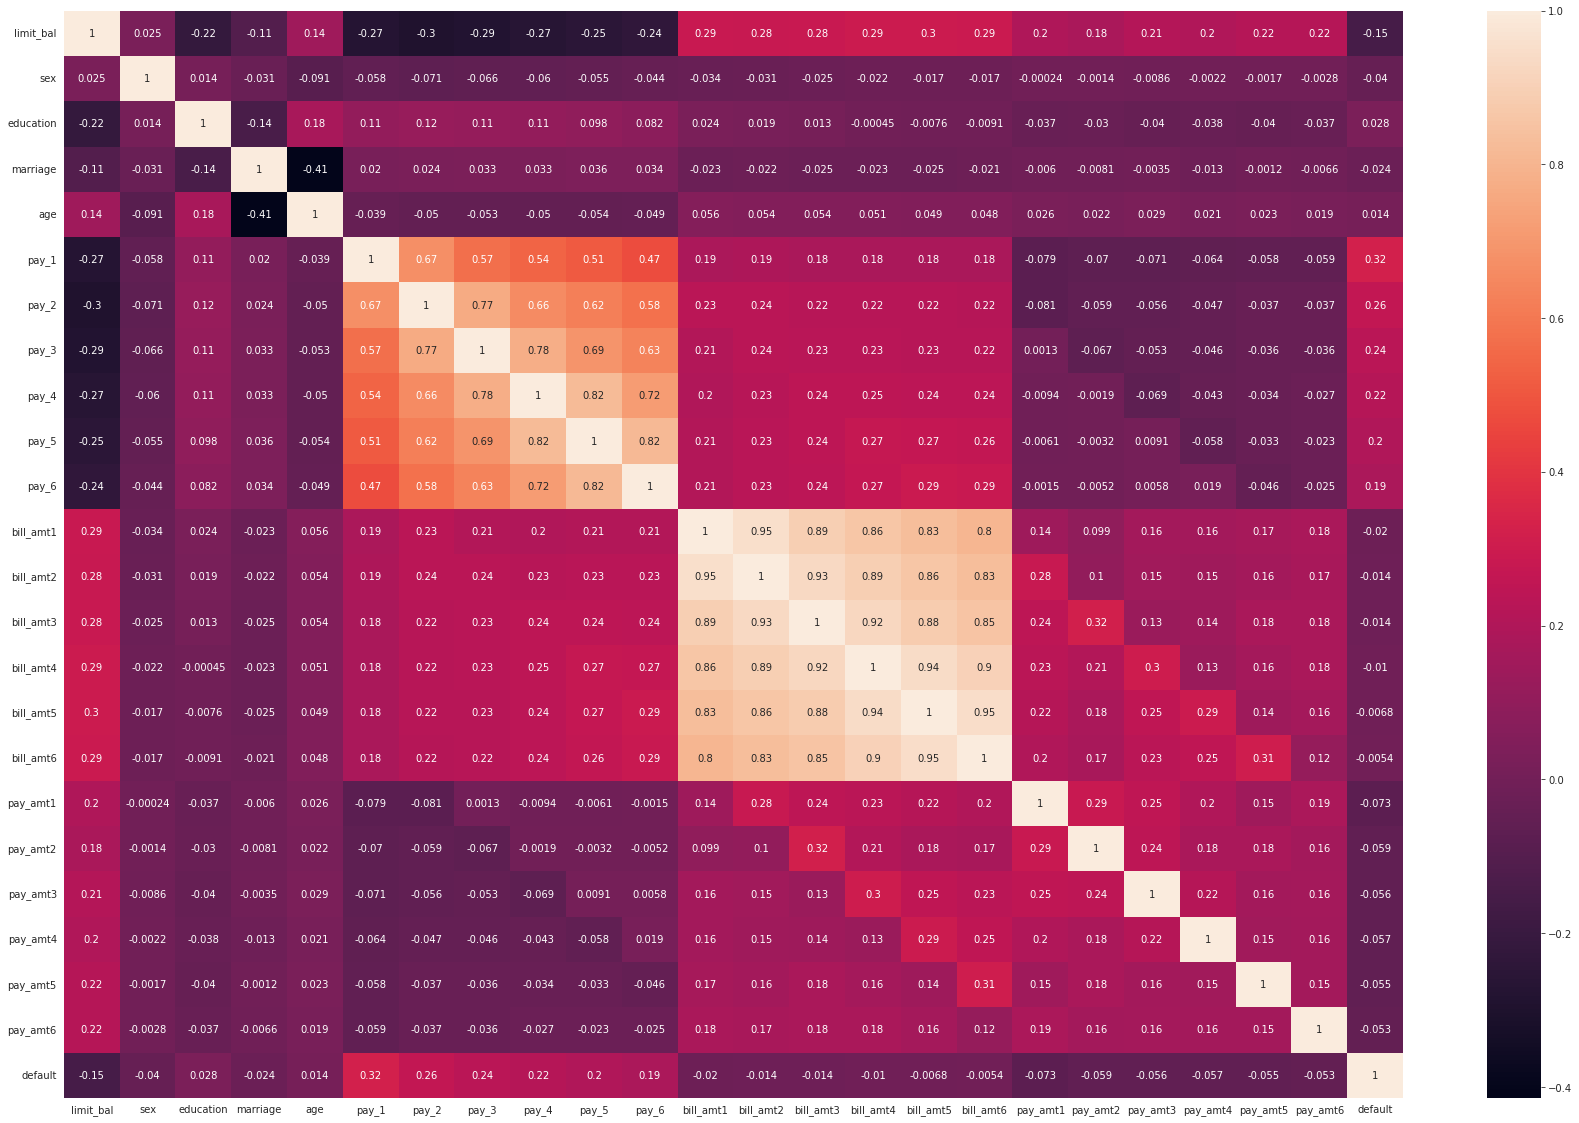

In [23]:
# Heatmap to understand correlation between features & target column
plt.subplots(figsize=(30,20))
sns.heatmap(ccd.corr(), annot=True)
plt.show()

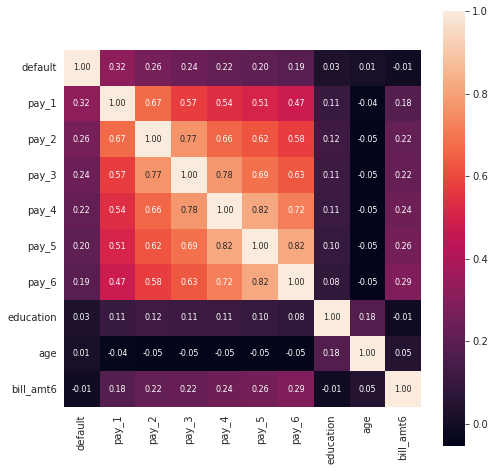

In [24]:
k = 10 #number of variables for heatmap
corrmat = ccd.corr()
cols = corrmat.nlargest(k, 'default')['default'].index
cm = np.corrcoef(ccd[cols].values.T)
# sns.set(font_scale=1.25)
plt.subplots(figsize=(8,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

# Save the figure
plt.savefig('heatmap.png')
plt.show()

> Clearly, we can see from above two plots there aren't any features highly correlated with the target feature. However, the next month default prediction is dependent on the repayment status of last 6 months especially the repayment status in September. We can also see the multicollinearity between repayment status features.
> First, we will try to train the model with all the features and then based on the result reduce the unnecessary predictors.    



In [26]:
ccd.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

> The model performance is absolutely bad in terms of classifying positive points correctly with all the features. However, the negative points are almost identified correctly by the model. The ROC curve with AUC score of 0.50 shows that the classifier either predicts random class or constant class for all data points and is not able to distinguish between positive and negative classes. 

> We remove repayment status features since those features are correlated with each other and try to compressed that information into a new feature called months delayed. 



In [31]:
ccd.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'male', 'married',
       'grad_school', 'university'],
      dtype='object')

In [35]:
# Creating delayed features: 1 if repayment status > 0 else 0
# delayed_features = ['delayed_'+str(i) for i in range(1, 7)]
# for pay, delayed in zip(pay_features, delayed_features):
#     ccd[delayed] = (ccd[pay] > 0).astype(int)

# # Creating a new feature: months delayed
# ccd['months_delayed'] = ccd[delayed_features].sum(axis=1)

In [36]:
# numerical_features = numerical_features + ['months_delayed']
# binary_features = ['male', 'married', 'grad_school', 'university']
# X = ccd[numerical_features + binary_features + pay_features]
# y = ccd['default']


# # Spliting data into train and test set 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# # Standardize the numerical features so they are in the same scale with a mean of 0 and std of 1
# scaler = StandardScaler()
# scaler.fit(X_train[numerical_features])
# X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [37]:
# MODEL 2: LOGISTIC REGRESSION - pay_{1, 6} features + months_delayed feature
# log_reg_2 = LogisticRegression()
# log_reg_2.fit(X_train, y_train)

# # Predict
# y_pred_train_2 = log_reg_2.predict(X_train)
# y_pred_test_2 = log_reg_2.predict(X_test)

In [38]:
# # Print the metrics (Model 2)
# print('Train Result')
# calculate_metrics(y_train, y_pred_train_2)
# print('\n')
# calculate_metrics(y_test, y_pred_test_2)



> - No improvement at all in model performance.

